In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import seaborn as sns
import math

pd.set_option('display.max_columns', 500)
sns.set_style('whitegrid')


In [2]:
data_path = "./COVID-19/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-"
df_cases_raw = pd.read_csv(data_path+"Confirmed.csv", index_col=False)
df_deaths_raw = pd.read_csv(data_path+"Deaths.csv", index_col=False)
df_recoveries_raw = pd.read_csv(data_path+"Recovered.csv", index_col=False)

In [3]:
top_cases = df_cases_raw.groupby(by='Country/Region', as_index=False).agg('sum').nlargest(11, df_cases_raw.columns[-1])['Country/Region']
top_cases

30              China
73              Italy
69               Iran
133             Spain
57            Germany
146                US
53             France
79       Korea, South
138       Switzerland
149    United Kingdom
103       Netherlands
Name: Country/Region, dtype: object

In [4]:
def preprocess_frame(df):
    df = df.groupby(by='Country/Region', as_index=False).agg('sum')
    df = df.drop(['Lat', 'Long'], 1)
    df = df.set_index('Country/Region').T
    df['Date'] = df.index
    df.insert(0, 'Day', range(0, len(df)))
    return df

df_cases = preprocess_frame(df_cases_raw)
df_deaths = preprocess_frame(df_deaths_raw)
df_recoveries = preprocess_frame(df_recoveries_raw)

In [5]:
df_cases.head()

Country/Region,Day,Afghanistan,Albania,Algeria,Andorra,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,"Bahamas, The",Bahrain,Bangladesh,Barbados,Belarus,Belgium,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Brazil,Brunei,Bulgaria,Burkina Faso,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Congo (Brazzaville),Congo (Kinshasa),Costa Rica,Cote d'Ivoire,Croatia,Cruise Ship,Cuba,Cyprus,Czechia,Denmark,Djibouti,Dominican Republic,Ecuador,Egypt,El Salvador,Equatorial Guinea,Estonia,Eswatini,Ethiopia,Fiji,Finland,France,Gabon,"Gambia, The",Georgia,Germany,Ghana,Greece,Guatemala,Guinea,Guyana,Holy See,Honduras,Hungary,Iceland,India,Indonesia,Iran,Iraq,Ireland,Israel,Italy,Jamaica,Japan,Jordan,Kazakhstan,Kenya,"Korea, South",Kosovo,Kuwait,Kyrgyzstan,Latvia,Lebanon,Liberia,Liechtenstein,Lithuania,Luxembourg,Malaysia,Maldives,Malta,Martinique,Mauritania,Mauritius,Mexico,Moldova,Monaco,Mongolia,Montenegro,Morocco,Namibia,Nepal,Netherlands,New Zealand,Nicaragua,Nigeria,North Macedonia,Norway,Oman,Pakistan,Panama,Paraguay,Peru,Philippines,Poland,Portugal,Qatar,Romania,Russia,Rwanda,Saint Lucia,Saint Vincent and the Grenadines,San Marino,Saudi Arabia,Senegal,Serbia,Seychelles,Singapore,Slovakia,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Taiwan*,Tanzania,Thailand,Togo,Trinidad and Tobago,Tunisia,Turkey,US,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Venezuela,Vietnam,Zambia,Date
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,0,0,0,0,1,0,0,0,0,0,0,0,0,1/22/20
1/23/20,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,0,1,0,0,0,0,0,0,2,0,1/23/20
1/24/20,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,5,0,0,0,0,2,0,0,0,0,0,0,2,0,1/24/20
1/25/20,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,3,0,7,0,0,0,0,2,0,0,0,0,0,0,2,0,1/25/20
1/26/20,4,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,3,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,4,0,8,0,0,0,0,5,0,0,0,0,0,0,2,0,1/26/20


In [6]:
def shift_to_day_zero(df, df_reference):
    for key in df.columns:
        if key!= 'Date' and key!='Day':
            if df_reference[key].sum()>0:
                df[key] = df[key].shift(-df_reference['Day'][df_reference[key]>0].iloc[0])
    

df_cases_reference = df_cases.copy()
shift_to_day_zero(df_cases, df_cases_reference)
shift_to_day_zero(df_deaths, df_cases_reference)
shift_to_day_zero(df_recoveries, df_cases_reference)

In [7]:
def normalize(df):
    for key in df.columns:
        if key != 'Date' and key!='Day':
            df[key] = df[key]/df[key].max()
            

#normalize(df_foo)

<IPython.core.display.Javascript object>


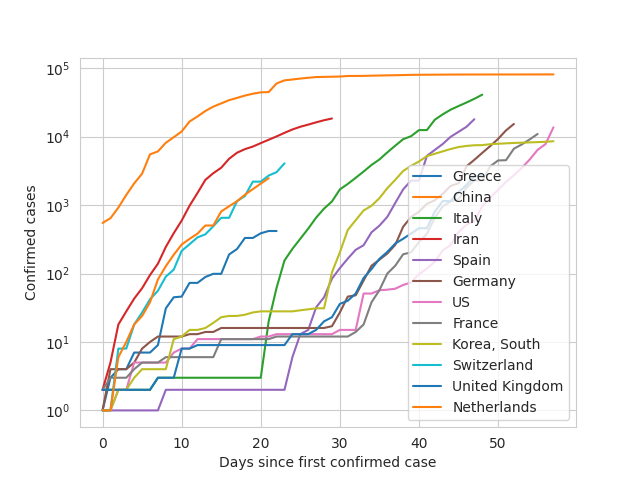

In [8]:
%matplotlib notebook

#countries = ['Italy', 'Germany', 'US', 'Austria', 'Canada', 'France', 'Japan', 'Norway', 'Switzerland', 'China']
countries = top_cases
def plot_confirmed_cases(df, countries):
    g = sns.lineplot(df['Day'], df['Greece'], label='Greece')
    for country in countries:
        sns.lineplot(df['Day'], df[country], label=country)
    g.set(xlabel='Days since first confirmed case', ylabel='Confirmed cases')
    g.set_yscale("log")
    plt.legend()
 

plot_confirmed_cases(df_cases, countries)

<IPython.core.display.Javascript object>


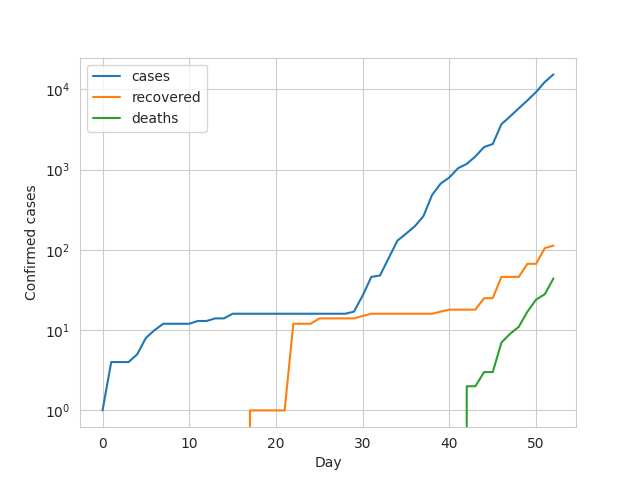

In [58]:
%matplotlib notebook

def plot_case_death_recovery(country):
    g = sns.lineplot(df_cases['Day'], df_cases[country], label='cases')
    sns.lineplot(df_recoveries['Day'], df_recoveries[country], label='recovered')
    sns.lineplot(df_deaths['Day'], df_deaths[country], label='deaths')
    g.set(ylabel='Confirmed cases')
    g.set_yscale("log")
    plt.legend()

plot_case_death_recovery('Germany')

<IPython.core.display.Javascript object>


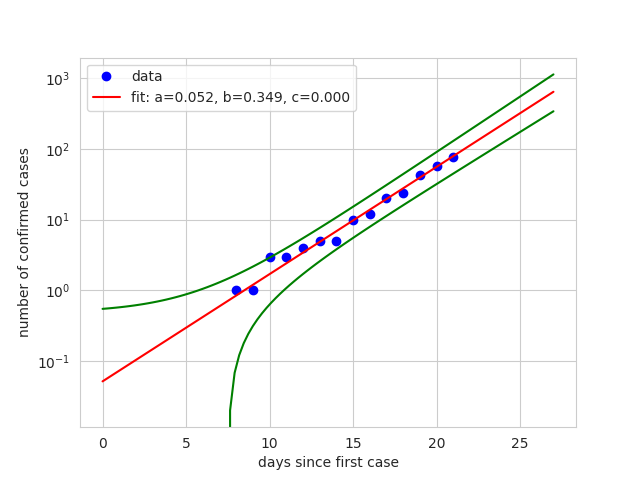

[5.19814229e-02 3.48824231e-01 1.09402283e-13]
[[ 1.77290013e-04 -1.65635552e-04 -3.98675870e-03]
 [-1.65635552e-04  1.55385925e-04  3.57991962e-03]
 [-3.98675870e-03  3.57991962e-03  2.34503400e-01]]


In [82]:
%matplotlib notebook

from pylab import *
from scipy.optimize import curve_fit

country = 'Netherlands'

df = df_deaths.copy()

firstday = 0
lastday = df[country].dropna().shape[0]

xdata = df['Day'][(df['Day']>=firstday) & (df['Day']<lastday)]
ydata = df[country][(df['Day']>=firstday) & (df['Day']<lastday)]

def func(x, a, b, c):
    return a * np.exp(b * x) + c

plt.plot(xdata, ydata, 'bo', label='data')

popt, pcov = curve_fit(func, xdata, ydata, [1,0.1,0.1], bounds=[[-100, -100, 0],[100, 100, 100]])
print(popt)
print(pcov)
x = np.linspace(firstday, lastday+5 , 100)
plt.plot(x, func(x, *popt), 'r-',label='fit: a=%5.3f, b=%5.3f, c=%5.3f' % tuple(popt))

perr=np.sqrt(np.diag(pcov)) #standard errors
#perturbed plots
plt.plot(x,func(x, *popt+perr), 'g')
plt.plot(x,func(x, *popt-perr), 'g')

plt.xlabel('days since first case')
plt.ylabel('number of confirmed cases')
plt.legend()
plt.yscale('log')
plt.show()



In [ ]:
%matplotlib notebook
x = np.linspace(50, 55, 10)
plt.plot(x, func(x, *popt))
plt.show()

In [22]:
df_cases['Greece']

1/22/20      1.0
1/23/20      3.0
1/24/20      4.0
1/25/20      4.0
1/26/20      7.0
1/27/20      7.0
1/28/20      7.0
1/29/20      9.0
1/30/20     31.0
1/31/20     45.0
2/1/20      46.0
2/2/20      73.0
2/3/20      73.0
2/4/20      89.0
2/5/20      99.0
2/6/20      99.0
2/7/20     190.0
2/8/20     228.0
2/9/20     331.0
2/10/20    331.0
2/11/20    387.0
2/12/20    418.0
2/13/20    418.0
2/14/20      NaN
2/15/20      NaN
2/16/20      NaN
2/17/20      NaN
2/18/20      NaN
2/19/20      NaN
2/20/20      NaN
2/21/20      NaN
2/22/20      NaN
2/23/20      NaN
2/24/20      NaN
2/25/20      NaN
2/26/20      NaN
2/27/20      NaN
2/28/20      NaN
2/29/20      NaN
3/1/20       NaN
3/2/20       NaN
3/3/20       NaN
3/4/20       NaN
3/5/20       NaN
3/6/20       NaN
3/7/20       NaN
3/8/20       NaN
3/9/20       NaN
3/10/20      NaN
3/11/20      NaN
3/12/20      NaN
3/13/20      NaN
3/14/20      NaN
3/15/20      NaN
3/16/20      NaN
3/17/20      NaN
3/18/20      NaN
3/19/20      NaN
Name: Greece, 